In [1]:
import pandas as pd
import glob
import numpy as np
import os
import sys

# Get the parent directory (ManifoldSPC)
project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(project_dir)
print(project_dir)


from src.utils.Filters import ARFilter
from src.utils.functions import *
import src.models as models

c:\Users\ibura\Manifold SPC


Iter 1: sigma=0.082384
Iter 2: sigma=0.107868
Iter 3: sigma=0.120725
Iter 4: sigma=0.126424
Iter 5: sigma=0.128891
Iter 6: sigma=0.129708
Iter 7: sigma=0.129962
Iter 8: sigma=0.129815
Iter 9: sigma=0.129961
Iter 10: sigma=0.129815
Max iterations reached. Final sigma = 0.129815


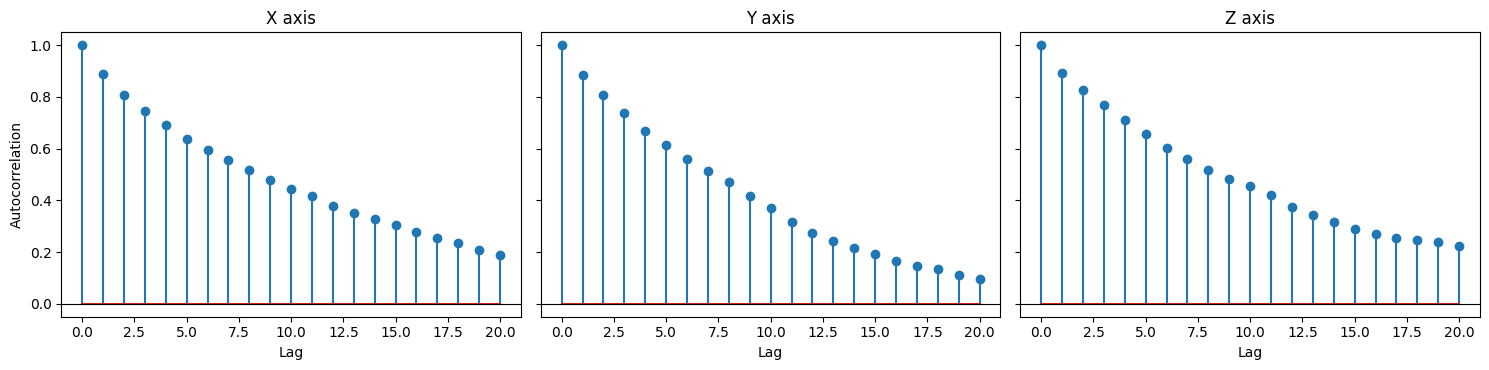

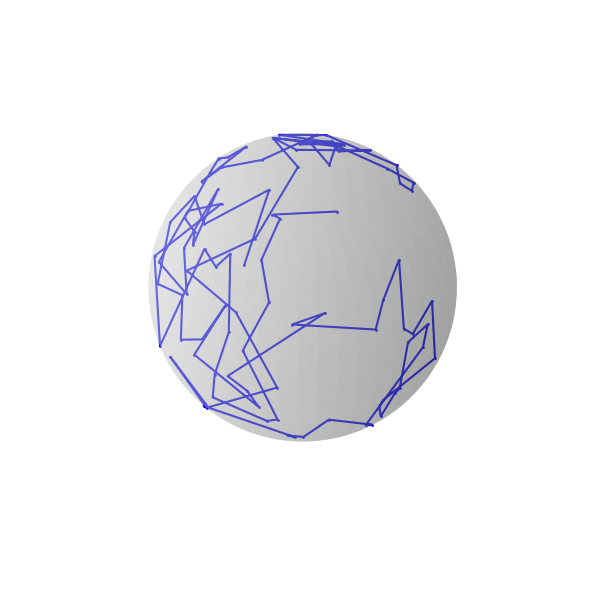

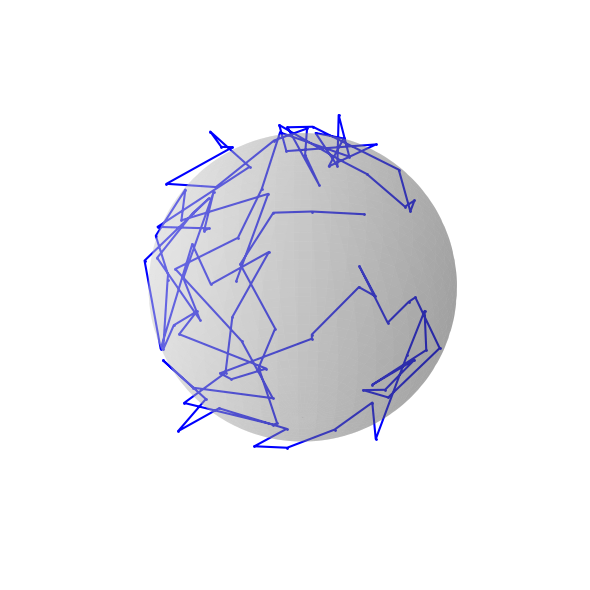

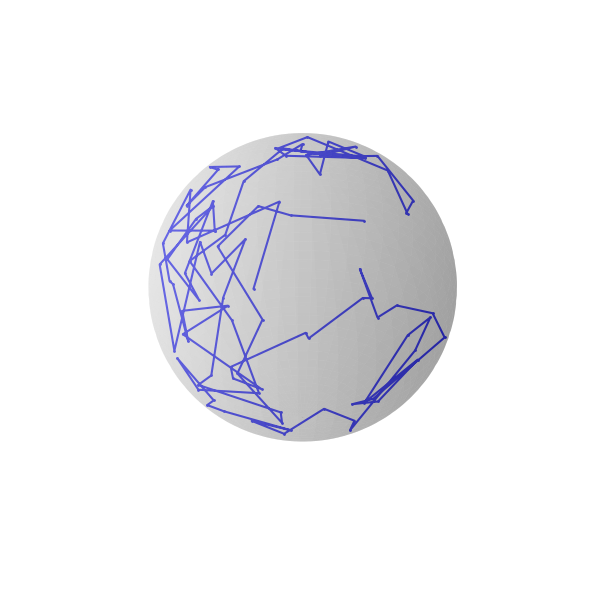

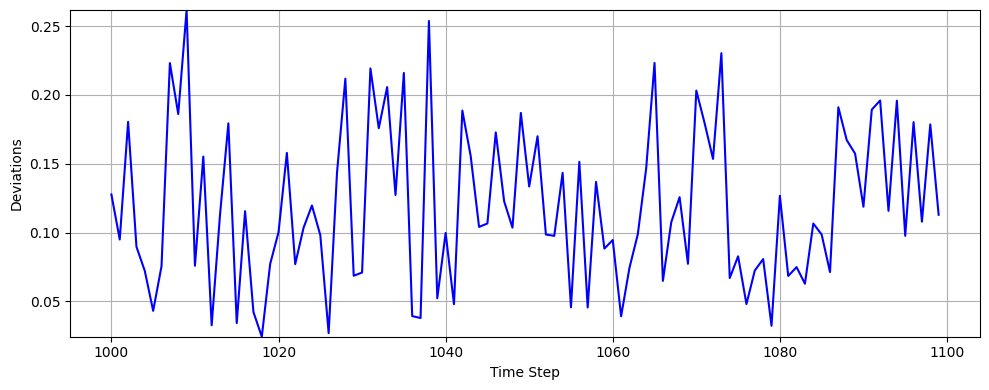

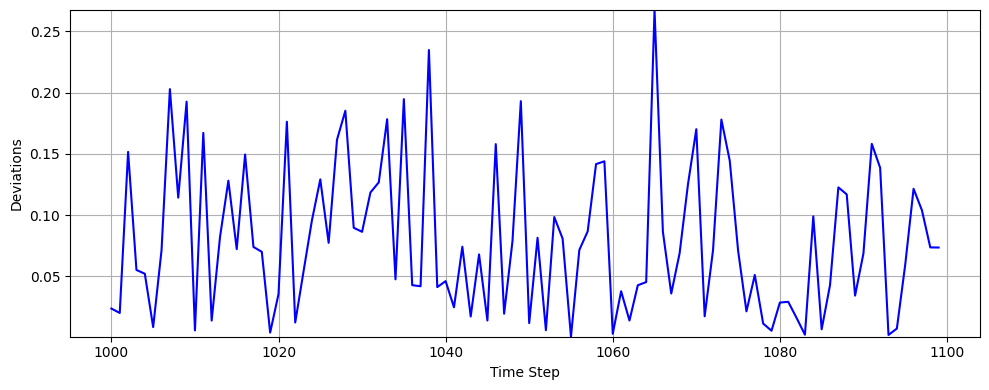

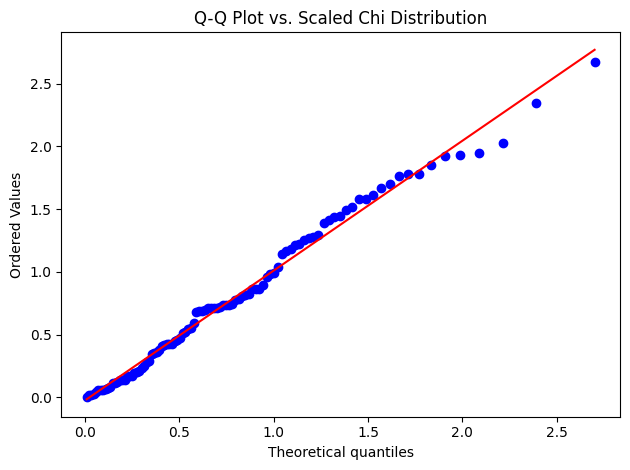

K-S test statistic: 0.0629, p-value: 0.8004
Cannot reject null: data MAY follow scaled Chi distribution


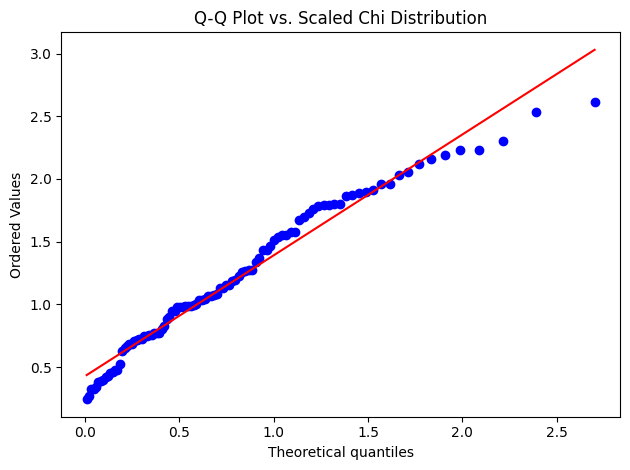

K-S test statistic: 0.3272, p-value: 0.0000
Reject null: data does NOT follow scaled Chi distribution


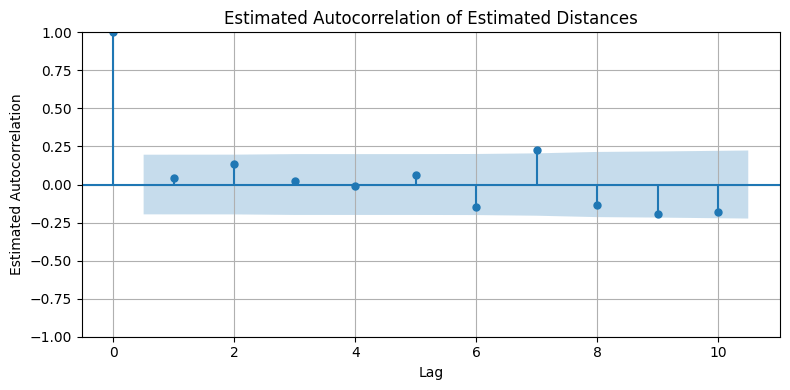

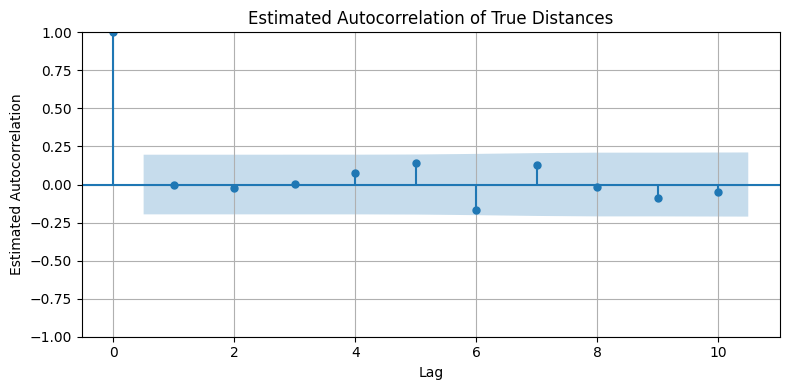

In [2]:
# Make the figures presented in Section 3.3 about the stochastic process in R^3 
# Parameters
np.random.seed(12)
n = 1100
d = 3
n_to_plot = 100
sigma = 0.1
df = 1

#Generate Data
data = generate_stochastic_process_on_sphere(n,d=3)
data_noisy = data + np.random.normal(scale = sigma, size=(n,d))
manifold_data = data_noisy[:1000]
phase2_data =  data_noisy[1000:]

# Project the points
mf = models.MF(data=manifold_data,c0=4,c1=2,c2=4,sigma=0.05,d=2,estimate_sig=True,verbose=True)
projected_data, _ = mf.project(points=phase2_data)

# Make the ACF plot by axis
estimated_ACF_plot_by_axis(manifold_data,figure_path="figures/auto_correlation_on_sphere.png")

#  make the 3D Trajectory plots
threeD_plot_on_sphere(data=data,figure_path="figures/trajectory_on_sphere.png",n_to_plot=n_to_plot)
threeD_plot_on_sphere(data=data_noisy,figure_path="figures/noisy_trajectory_on_sphere.png",n_to_plot=n_to_plot)
threeD_plot_on_sphere(data=projected_data,figure_path="figures/projected_trajectory_on_sphere.png",n_to_plot=n_to_plot)

# Make the figures regarding the distances
true_distances = np.array(distance_to_hypersphere(phase2_data,d=3,r=1)).reshape(-1)
estimated_distances = np.linalg.norm(projected_data-phase2_data,axis=1)
deviation_plots(deviations=estimated_distances, figure_path= "figures/estimated_distances.png")
deviation_plots(deviations=true_distances, figure_path= "figures/true_distances.png")
KS_test_QQ_plot(true_distances,figure_path="figures/q_q_true_distances.png",df=df,sigma=sigma)
KS_test_QQ_plot(estimated_distances,figure_path="figures/q_q_estimated_distances.png",df=df,sigma=sigma)
estimated_ACF_plot(estimated_distances,figure_path="figures/autocorrelation_of_estimated_distances.png",fig_title='Estimated Autocorrelation of Estimated Distances')
estimated_ACF_plot(true_distances,figure_path="figures/autocorrelation_of_true_distances.png",fig_title='Estimated Autocorrelation of True Distances')

Iter 1: sigma=0.031278
Iter 2: sigma=0.022825
Iter 3: sigma=0.013916
Iter 4: sigma=0.010819
Iter 5: sigma=0.010727
Iter 6: sigma=0.010744
Iter 7: sigma=0.010736
Estimated sigma converged to 0.010736


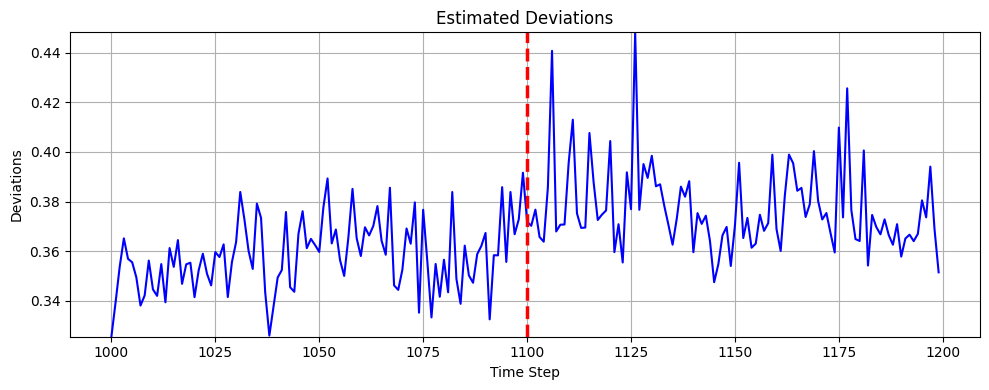

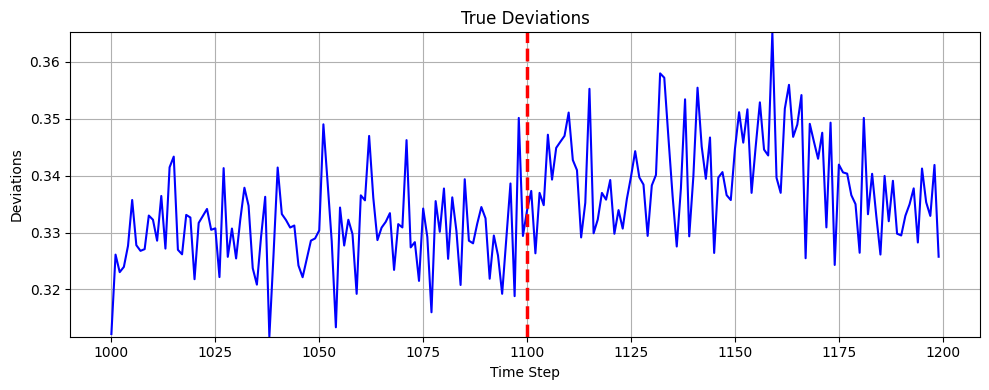

In [3]:
# Make the figures presented in Section 3.3 about the stochastic process in R^1100
np.random.seed(12)

# Parameters
n = 1200
d = 3
n_to_plot = 100
D = 1100
sigma = 0.01

# Generate Data
data = generate_stochastic_process_on_sphere(n=n,d=3)
padding = np.zeros((n, D - d))
data = np.hstack((data, padding))
data_noisy = data + np.random.normal(scale = sigma, size=(n,D))
manifold_data = data_noisy[:1000]
ic_data =  data_noisy[1000:1100]
oc_data =  data_noisy[1100:1200]
oc_data[:,0] += 10*sigma

# Project the points
mf = models.MF(data=manifold_data,c0=50,c1=35,c2=50,sigma=0.05,d=2,verbose=True,estimate_sig=True)
estimated_distances_ic = mf.deviations(points=ic_data)
estimated_distances_oc = mf.deviations(points=oc_data)

# Distances
# estimated_distances_ic = np.linalg.norm(projected_data_ic-ic_data,axis=1)
# estimated_distances_oc = np.linalg.norm(projected_data_oc-oc_data,axis=1)
true_distances_ic = distance_to_hypersphere(ic_data, d=3,r=1)
true_distances_oc = distance_to_hypersphere(oc_data, d=3,r=1)
estimated_distances = np.concatenate((estimated_distances_ic, estimated_distances_oc))
true_distances = np.concatenate((true_distances_ic, true_distances_oc))


# Deviation Figures
deviation_plots(deviations=estimated_distances,
                figure_title='Estimated Deviations',
                 figure_path= "figures/high_dimensional_estimated_distances.png",
                 red_line=100)
deviation_plots(deviations=true_distances,
                figure_title='True Deviations',
                 figure_path= "figures/high_dimensional_true_distances.png",
                 red_line=100)


In [2]:
# Make the figures presented in Section 5.2 about TE Process
# For this one we will use an IC dataset given in ICData folder
te_dr = os.path.join(project_dir, "src\data\TennesseeEastmanProcess")
ic_data_dir = os.path.join(te_dr,"ICData")
pickle_dir = os.path.join(te_dr,"TEpkl")

pickles = pickle_loader(pickle_dir)
keep_mask = pickles["keep_mask"]
scales = pickles["scales"]

d = np.loadtxt(os.path.join(ic_data_dir,"dataIC.csv") , delimiter=",")
d = d/scales
d = d[:,keep_mask]

n_warm_up = 5000
n_manifold = 700 + n_warm_up
n_var = 400
n_ic = n_manifold+n_var-n_warm_up
n_test = 100


manifold_data = d[n_warm_up:n_manifold].copy()
ic_data = d[n_warm_up:n_ic].copy()
var_data = d[n_manifold:n_manifold+n_var].copy()
test_data = d[n_manifold+n_var:n_manifold+n_var+n_test].copy()

# We will first estimate intrinsic dimensionality of it

import numpy as np
import matplotlib.pyplot as plt
from skdim.id import TwoNN, MLE,TLE

methods = {
    "TWO-NN": TwoNN(),
    "MLE": MLE(),
    "TLE": TLE()
}
results = {}
for name, model in methods.items():
    est_dim = model.fit(manifold_data).dimension_
    results[name] = est_dim
    print(f"{name}: Estimated Dimension = {est_dim:.2f}")

TWO-NN: Estimated Dimension = 23.17
MLE: Estimated Dimension = 21.13
TLE: Estimated Dimension = 20.55


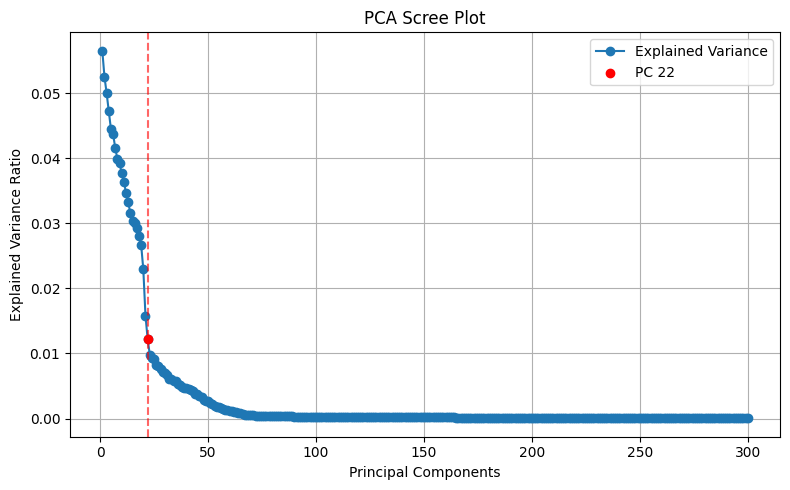

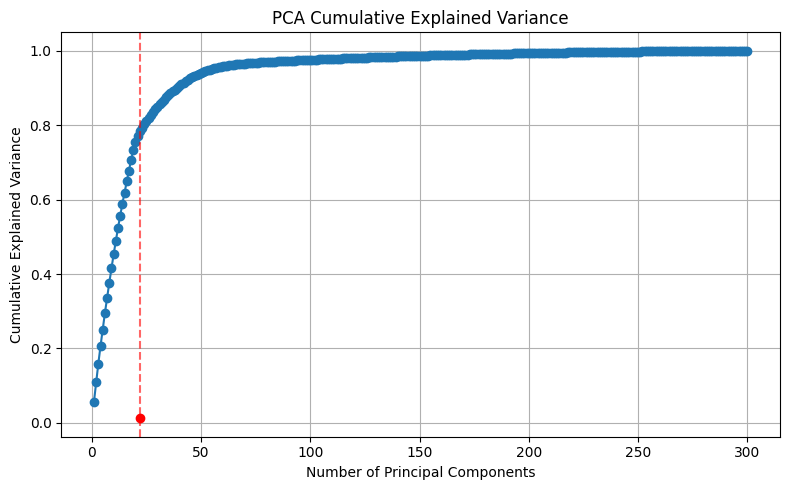

In [ ]:
# Next we will create the PCA plots given in Section 5.2


# We set intrinsic dimensionality to 22
n_dim = 22
n_neighbors = 15


# Fit PCA
pca = models.PCA()
pca.fit(manifold_data)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
highlight_index = n_dim - 1


# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', label='Explained Variance')
plt.scatter(highlight_index + 1, explained_var[highlight_index], color='red', zorder=5, label=f'PC {highlight_index + 1}')
plt.axvline(highlight_index + 1, linestyle='--', color='red', alpha=0.6)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/pca_scree_plot.png", dpi=300)

# Cumulative Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o')
plt.scatter(highlight_index + 1, explained_var[highlight_index], color='red', zorder=5, label=f'PC {highlight_index + 1}')
plt.axvline(highlight_index + 1, linestyle='--', color='red', alpha=0.6)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.savefig("figures\pca_cum_var.png", dpi=300) 

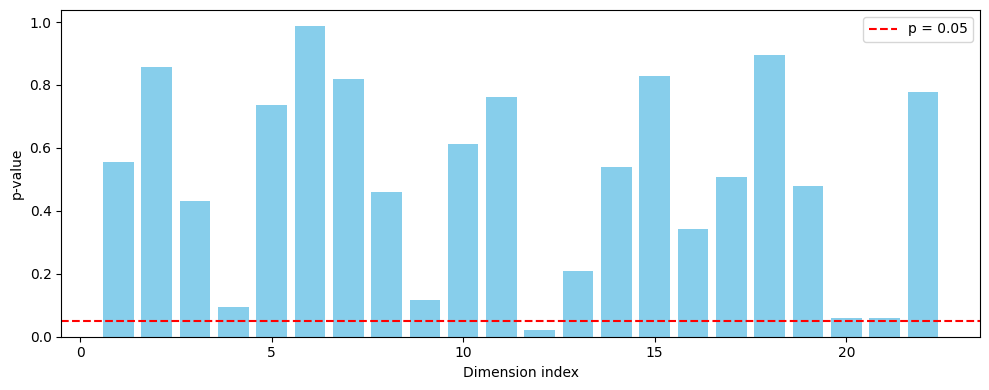

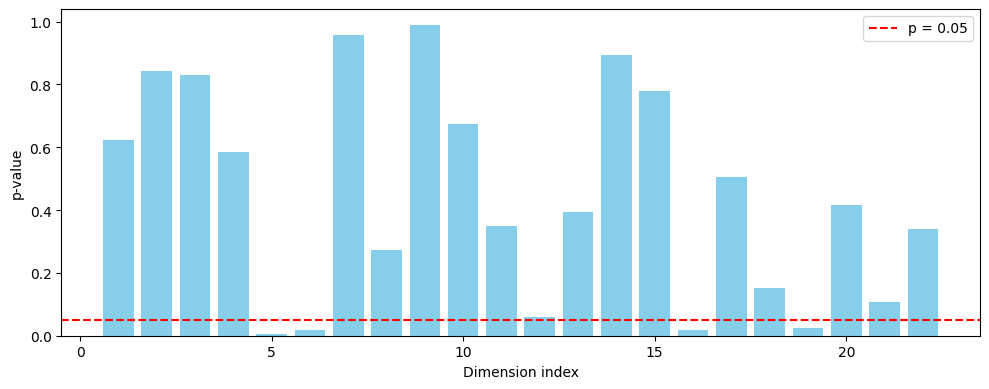

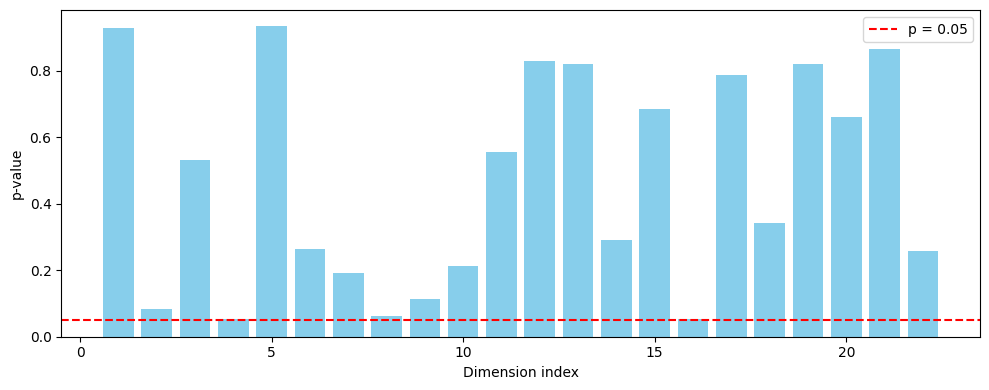

In [ ]:
# make the p-value plots given in Section 5.2

# Fit the models
pca = models.PCA(n_components=n_dim)
pca_ic = pca.fit_transform(manifold_data)
lpp = models.LPP(n_components=n_dim,n_neighbors=n_neighbors,weight="heat")
lpp_ic = lpp.fit_transform(manifold_data)
npe = models.NPE(n_components=n_dim,n_neighbors=n_neighbors)
npe_ic = npe.fit_transform(manifold_data)

# Fit the ARfilters
lpp_var = ARFilter(lpp.transform(var_data),max_p=20)
npe_var = ARFilter(npe.transform(var_data),max_p=20)
pca_var = ARFilter(pca.transform(var_data),max_p=20)

# Find the forecast errors
lpp_pred_erros = lpp_var.predict_errors(lpp.transform(test_data))
npe_pred_erros = npe_var.predict_errors(npe.transform(test_data))
pca_pred_erros = pca_var.predict_errors(pca.transform(test_data))

# Plot the p values of normality test applied to each dimensionality
test_normality_plot(lpp_pred_erros, figure_path="figures\lpp_p_values.png")
test_normality_plot(npe_pred_erros, figure_path="figures\\npe_p_values.png") 
test_normality_plot(pca_pred_erros, figure_path="figures\pca_p_values.png") 